In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Connect to SQLite database (creates file automatically)
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create sales table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

print("Table created successfully!")

Table created successfully!


In [3]:
# Insert sample data
sample_data = [
    ("Laptop", 5, 50000),
    ("Mobile", 10, 20000),
    ("Tablet", 7, 15000),
    ("Laptop", 3, 52000),
    ("Mobile", 5, 21000),
    ("Tablet", 4, 16000)
]

cursor.executemany(
    "INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", 
    sample_data
)

conn.commit()

print("Data inserted successfully!")

Data inserted successfully!


In [4]:
# SQL Query
query = """
SELECT 
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

df = pd.read_sql_query(query, conn)

print("📊 Sales Summary:")
print(df)

📊 Sales Summary:
  product  total_qty   revenue
0  Laptop         16  812000.0
1  Mobile         30  610000.0
2  Tablet         22  338000.0


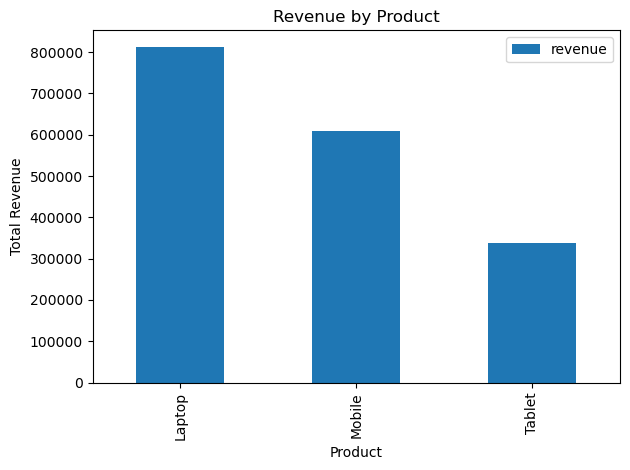

In [5]:
df.plot(kind='bar', x='product', y='revenue')

plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Total Revenue")
plt.tight_layout()

plt.savefig("sales_chart.png")  # Save chart
plt.show()